In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading in all data of use
train_data = pd.read_csv('peter_data/train.csv')
test_data = pd.read_csv('peter_data/test.csv')
test_sample = pd.read_csv('peter_data/sample_submission.csv')

In [3]:
#Made sure there were no immediate issues with the structure of the data
print(test_data.shape)
test_sample.shape

(1459, 80)


(1459, 2)

In [4]:
#Joined the test pricing data with the test x data just in case any rows were deleted during cleaning
merged_inner = pd.merge(left=test_data, right=test_sample, left_on='Id', right_on='Id')
merged_inner.shape
#set merged data equal to name test_data
test_data = merged_inner

In [5]:
test_data.shape

(1459, 81)

In [6]:
pd.set_option('display.max_columns', None)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [7]:
train_data.sort_values(by='GrLivArea',ascending=False)[:2]

train_data = train_data.drop(train_data[train_data['Id']==1299].index)
train_data = train_data.drop(train_data[train_data['Id']==524].index)

In [8]:
# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)


In [9]:
# test_log = pd.DataFrame(test_data["SalePrice"])
# test_log_fit = pt.fit_transform(test_log)

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


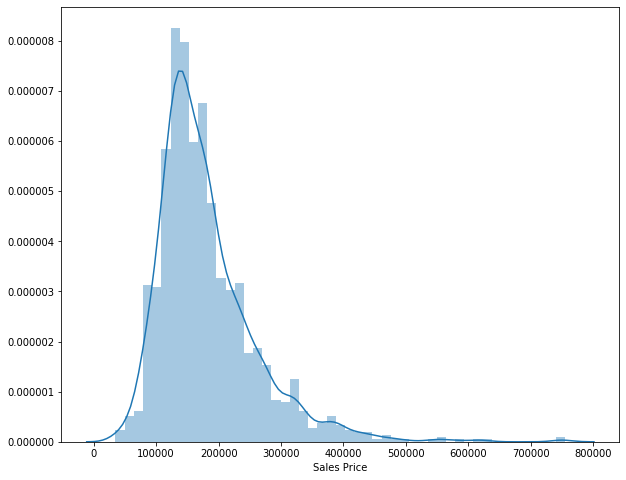

In [11]:
print(train_data['SalePrice'].describe())

#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sns.distplot(train_data['SalePrice'], ax=ax1).set(xlabel='Sales Price');

In [12]:
# test_log_fit = pd.DataFrame(test_log_fit)

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64


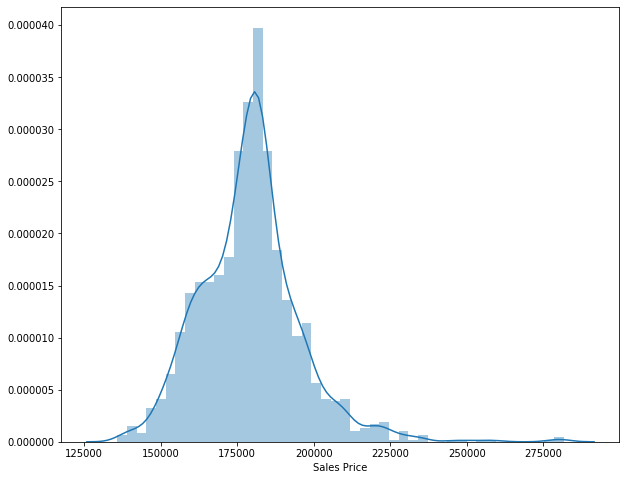

In [13]:
print(test_data['SalePrice'].describe())

#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sns.distplot(test_data['SalePrice'], ax=ax1).set(xlabel='Sales Price');

                 0
count  1459.000000
mean      1.099893
std       0.000002
min       1.099888
25%       1.099892
50%       1.099893
75%       1.099894
max       1.099899


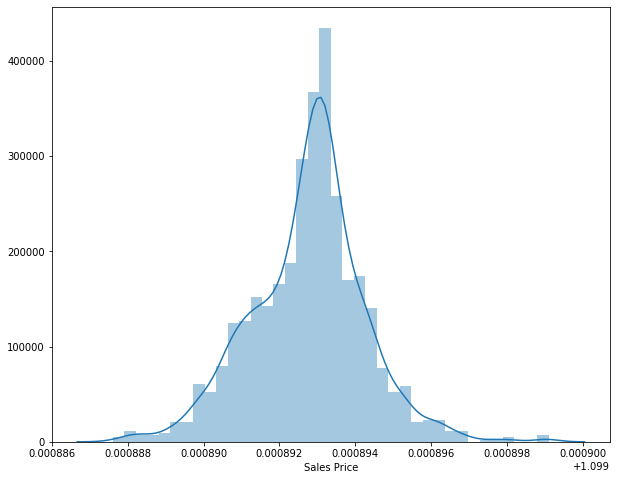

In [14]:
# print(test_log_fit.describe())

# #Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# # and will need to be either normalized or standardized
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# sns.distplot(test_log_fit, ax=ax1).set(xlabel='Sales Price');

In [16]:
# quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
# X_trans = quantile_transformer.fit_transform(test_log)
# quantile_transformer.quantiles_

array([[135751.31889282],
       [137956.40303093],
       [138978.18212131],
       [139186.9259052 ],
       [139577.01839101],
       [140373.24329595],
       [141467.15679495],
       [142475.09657122],
       [143081.05294551],
       [145003.9491554 ],
       [145289.23142189],
       [145724.378987  ],
       [146495.02197985],
       [146968.32128333],
       [147032.69773696],
       [147173.18017663],
       [147407.84608487],
       [148045.94405554],
       [148254.94008126],
       [148395.44511541],
       [149370.66745966],
       [149673.91632875],
       [150021.41590865],
       [150219.90665872],
       [150527.59361415],
       [150753.85894959],
       [150885.54747285],
       [151132.15612309],
       [151142.21900917],
       [151181.52521353],
       [151377.82353649],
       [151529.04893276],
       [151572.55854004],
       [151627.91341515],
       [151713.38474815],
       [151962.72435717],
       [152104.88789139],
       [152125.02858554],
       [1521

           SalePrice
count    1459.000000
mean   179183.918243
std     16518.303051
min    135751.318893
25%    168703.011202
50%    179208.665698
75%    186789.409363
max    281643.976117


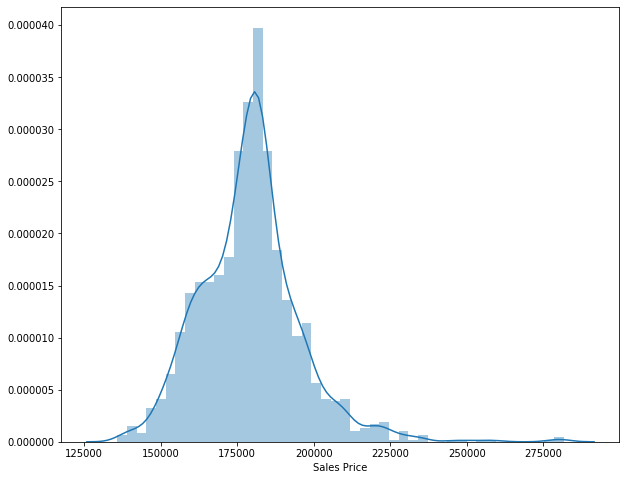

In [17]:
print(test_log.describe())

#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sns.distplot(test_log, ax=ax1).set(xlabel='Sales Price');

In [8]:
pd.set_option('display.max_columns', None)
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [10]:
print(train_data.isnull().sum().sort_values(ascending=False).head(20))

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64


In [11]:
train_data.loc[:, "MasVnrArea"] = train_data.loc[:, "MasVnrArea"].fillna(train_data["MasVnrArea"].mean())
train_data.loc[:, "MasVnrType"] = train_data.loc[:, "MasVnrType"].fillna(0)
train_data.loc[:, "BsmtFinType1"] = train_data.loc[:, "BsmtFinType1"].fillna(0)
train_data.loc[:, "BsmtQual"] = train_data.loc[:, "BsmtQual"].fillna(0)
train_data.loc[:, "BsmtCond"] = train_data.loc[:, "BsmtCond"].fillna(0)
train_data.loc[:, "BsmtExposure"] = train_data.loc[:, "BsmtExposure"].fillna(0)
train_data.loc[:, "BsmtFinType2"] = train_data.loc[:, "BsmtFinType2"].fillna(0)
train_data.loc[:, "GarageQual"] = train_data.loc[:, "GarageQual"].fillna(0)
train_data.loc[:, "GarageCond"] = train_data.loc[:, "GarageCond"].fillna("0")
train_data.loc[:, "GarageFinish"] = train_data.loc[:, "GarageFinish"].fillna(0)
train_data.loc[:, "GarageType"] = train_data.loc[:, "GarageFinish"].fillna(0)

train_data.loc[:, "GarageYrBlt"] = train_data.loc[:, "GarageYrBlt"].fillna(train_data["GarageYrBlt"].median())

train_data.loc[:, "LotFrontage"] = train_data.loc[:, "LotFrontage"].fillna(train_data["LotFrontage"].mean())

train_data.loc[:, "FireplaceQu"] = train_data.loc[:, "FireplaceQu"].fillna(0)
train_data.loc[:, "Fence"] = train_data.loc[:, "Fence"].fillna(0)
train_data.loc[:, "Alley"] = train_data.loc[:, "Alley"].fillna(0)
train_data.loc[:, "MiscFeature"] = train_data.loc[:, "MiscFeature"].fillna(0)
train_data.loc[:, "Electrical"] = train_data.loc[:, "Electrical"].fillna("SBrkr")
train_data.loc[:, "PoolQC"] = train_data.loc[:, "PoolQC"].fillna(0)

In [12]:
print(train_data.isnull().sum().sort_values(ascending=False).head())

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64


In [13]:
print(test_data.isnull().sum().sort_values(ascending=False).head(20))

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageFinish      78
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64


In [14]:
test_data.loc[:, "MasVnrArea"] = test_data.loc[:, "MasVnrArea"].fillna(test_data["MasVnrArea"].mean())
test_data.loc[:, "MasVnrType"] = test_data.loc[:, "MasVnrType"].fillna(0)
test_data.loc[:, "BsmtFinType1"] = test_data.loc[:, "BsmtFinType1"].fillna(0)
test_data.loc[:, "BsmtQual"] = test_data.loc[:, "BsmtQual"].fillna(0)
test_data.loc[:, "BsmtCond"] = test_data.loc[:, "BsmtCond"].fillna(0)
test_data.loc[:, "BsmtExposure"] = test_data.loc[:, "BsmtExposure"].fillna(0)
test_data.loc[:, "BsmtFinType2"] = test_data.loc[:, "BsmtFinType2"].fillna(0)
test_data.loc[:, "GarageQual"] = test_data.loc[:, "GarageQual"].fillna(0)
test_data.loc[:, "GarageCond"] = test_data.loc[:, "GarageCond"].fillna("0")
test_data.loc[:, "GarageFinish"] = test_data.loc[:, "GarageFinish"].fillna(0)
test_data.loc[:, "GarageType"] = test_data.loc[:, "GarageFinish"].fillna(0)

test_data.loc[:, "GarageYrBlt"] = test_data.loc[:, "GarageYrBlt"].fillna(test_data["GarageYrBlt"].median())

test_data.loc[:, "LotFrontage"] = test_data.loc[:, "LotFrontage"].fillna(test_data["LotFrontage"].mean())

test_data.loc[:, "FireplaceQu"] = test_data.loc[:, "FireplaceQu"].fillna(0)
test_data.loc[:, "Fence"] = test_data.loc[:, "Fence"].fillna(0)
test_data.loc[:, "Alley"] = test_data.loc[:, "Alley"].fillna(0)
test_data.loc[:, "MiscFeature"] = test_data.loc[:, "MiscFeature"].fillna(0)
test_data.loc[:, "Electrical"] = test_data.loc[:, "Electrical"].fillna("SBrkr")
test_data.loc[:, "PoolQC"] = test_data.loc[:, "PoolQC"].fillna(0)

test_data.loc[:, "MSZoning"] = test_data.loc[:, "MSZoning"].fillna("RL")
test_data.loc[:, "Utilities"] = test_data.loc[:, "Utilities"].fillna("AllPub")
test_data.loc[:, "Functional"] = test_data.loc[:, "Functional"].fillna("Typ")
test_data.loc[:, "BsmtFullBath"] = test_data.loc[:, "BsmtFullBath"].fillna(test_data["BsmtFullBath"].median())
test_data.loc[:, "BsmtHalfBath"] = test_data.loc[:, "BsmtHalfBath"].fillna(test_data["BsmtHalfBath"].median())
test_data.loc[:, "BsmtHalfBath"] = test_data.loc[:, "BsmtHalfBath"].fillna(0)
test_data.loc[:, "TotalBsmtSF"] = test_data.loc[:, "TotalBsmtSF"].fillna(test_data["TotalBsmtSF"].mean())
test_data.loc[:, "SaleType"] = test_data.loc[:, "SaleType"].fillna("WD")
test_data.loc[:, "BsmtUnfSF"] = test_data.loc[:, "TotalBsmtSF"].fillna(test_data["TotalBsmtSF"].mean())
test_data.loc[:, "BsmtFinSF2"] = test_data.loc[:, "BsmtFinSF2"].fillna(test_data["BsmtFinSF2"].mean())
test_data.loc[:, "BsmtFinSF1"] = test_data.loc[:, "BsmtFinSF1"].fillna(test_data["BsmtFinSF1"].mean())
test_data.loc[:, "GarageCars"] = test_data.loc[:, "GarageCars"].fillna(test_data["GarageCars"].median())
test_data.loc[:, "GarageArea"] = test_data.loc[:, "GarageArea"].fillna(test_data["GarageArea"].mean())
test_data = test_data.dropna(subset = ["Exterior1st","Exterior2nd","KitchenQual"])

In [15]:
print(test_data.isnull().sum().sort_values(ascending=False).head(20))

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64


In [16]:
pd.set_option('display.max_columns', None)
train_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,RFn,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,RFn,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,RFn,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500


In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train_df = train_data.select_dtypes(include=numerics)

In [18]:
numeric_train_df = numeric_train_df.drop(["Id"], axis=1)

In [19]:
numeric_train_df.corr()['SalePrice'].sort_values(ascending=False)[1:10]

OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
Name: SalePrice, dtype: float64

In [20]:
X_train = numeric_train_df.drop(["SalePrice"], axis =1)
y_train = numeric_train_df["SalePrice"]
y_train = pd.DataFrame(y_train)

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_test_df = test_data.select_dtypes(include=numerics)

In [22]:
numeric_test_df = numeric_test_df.drop(["Id"], axis=1)

In [23]:
X_test = numeric_test_df.drop(["SalePrice"], axis =1)
y_test = numeric_test_df["SalePrice"]
y_test = pd.DataFrame(y_test)

In [24]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [25]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

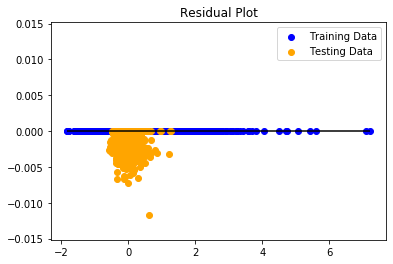

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train_scaled.min(), xmax=y_train_scaled.max())
plt.title("Residual Plot")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5.0683352784288624, R2: -116.2307047377793


In [28]:
print(model.score(X_train_scaled,y_train_scaled))
print(model.score(X_test_scaled,y_test_scaled))

1.0
-116.2307047377793


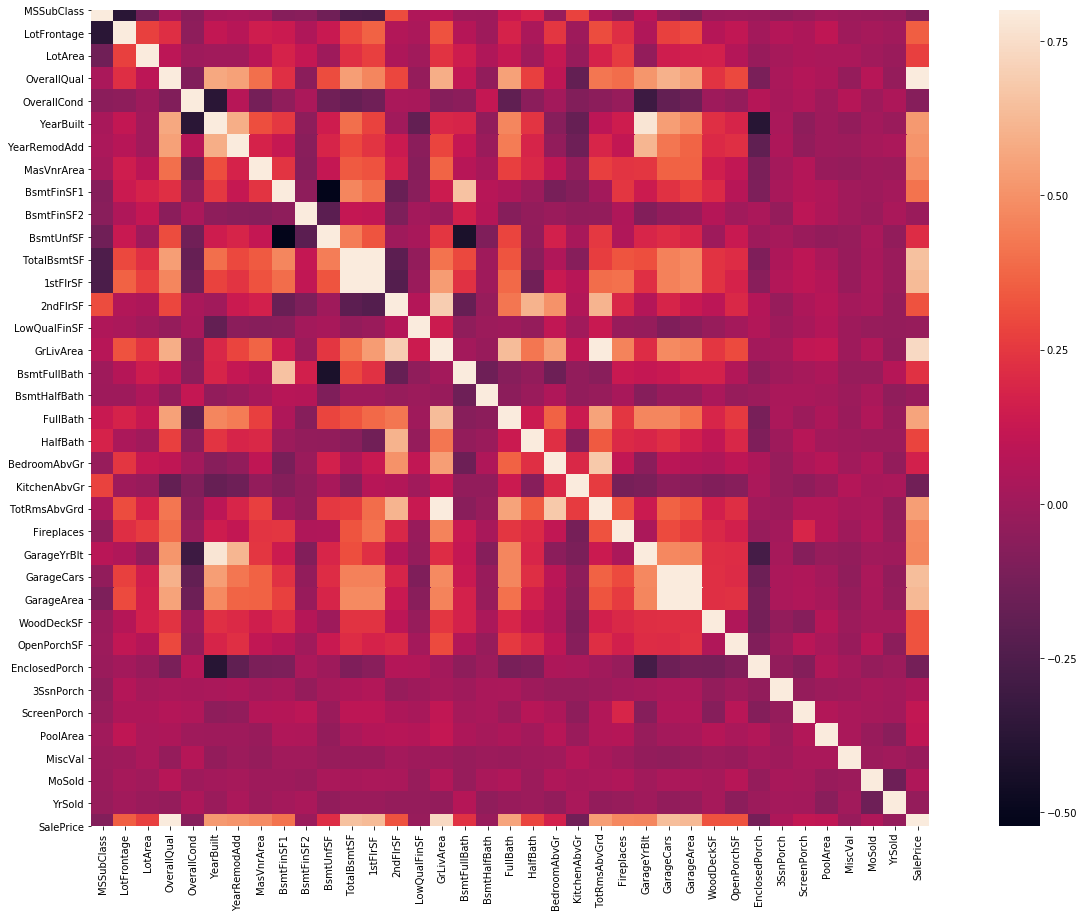

In [29]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

In [39]:
numeric_train_df = numeric_train_df.drop(["TotalBsmtSF", "GarageCars","TotRmsAbvGrd","GarageYrBlt", "BsmtFullBath","GrLivArea","HalfBath"], axis=1)
# numeric_train_df = numeric_train_df.drop(["HalfBath"], axis=1)
numeric_test_df = numeric_test_df.drop(["TotalBsmtSF", "GarageCars","TotRmsAbvGrd", "GarageYrBlt", "BsmtFullBath", "GrLivArea", "HalfBath"], axis=1)

In [40]:
X_train = numeric_train_df.drop(["SalePrice"], axis =1)
y_train = numeric_train_df["SalePrice"]
y_train = pd.DataFrame(y_train)

In [41]:
X_test = numeric_test_df.drop(["SalePrice"], axis =1)
y_test = numeric_test_df["SalePrice"]
y_test = pd.DataFrame(y_test)

In [43]:
X_train.shape

(1458, 29)

In [42]:
X_test.shape

(1457, 29)

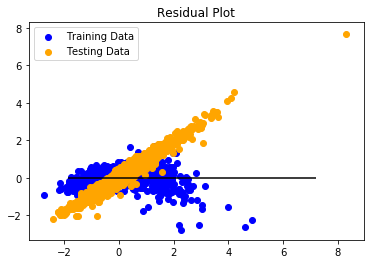

In [31]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train_scaled.min(), xmax=y_train_scaled.max())
plt.title("Residual Plot")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0014629626528508, R2: -22.1638600114418


In [33]:
model.score(X_train_scaled,y_train_scaled)

0.8649612311131198

In [34]:
model.score(X_test_scaled,y_test_scaled)

-22.1638600114418

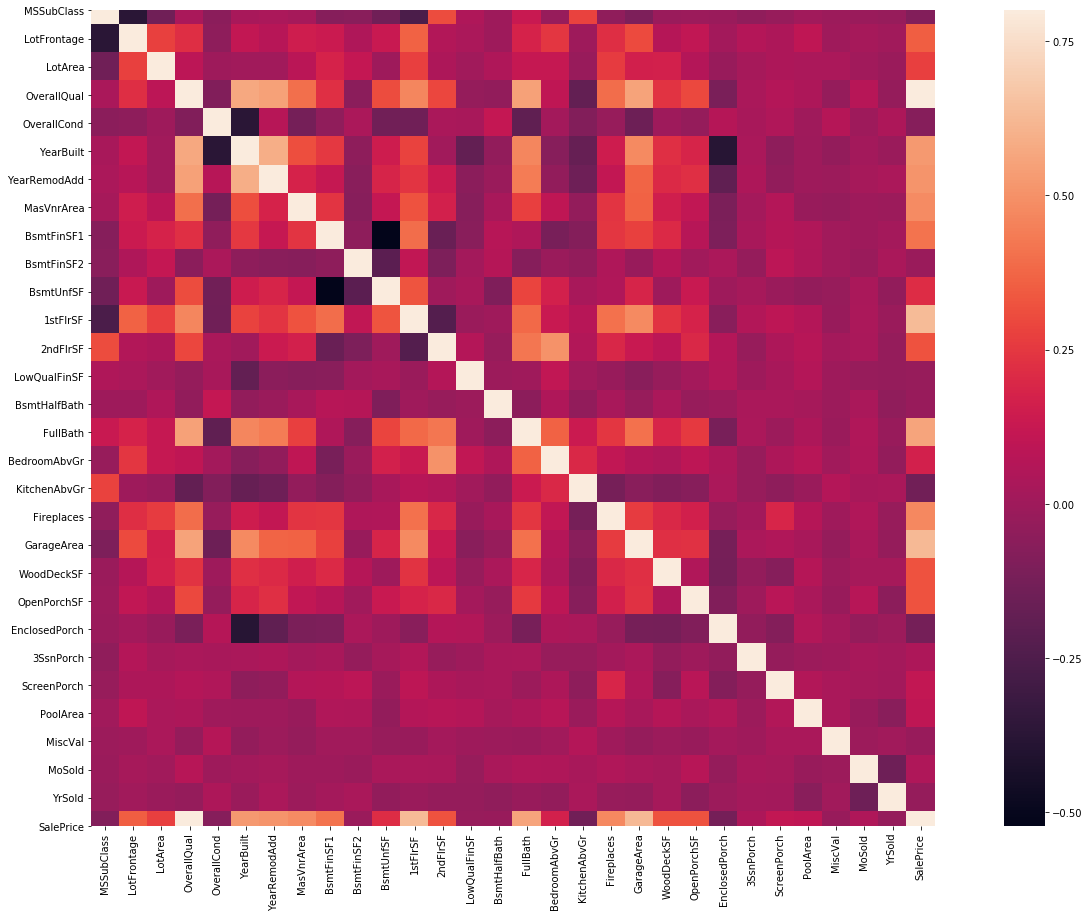

In [35]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

C:\Users\pshap\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
train_data = train_data.replace({
    "Utilities": {"AllPub": 1, "NoSeWa":0},
    "ExterQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "ExterCond": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "BsmtQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5 },
    "BsmtCond": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "BsmtExposure": {"No": 0, "None": 0, "Mn": 1, "Av": 2, "Gd": 3},
    "BsmtFinType1": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
    "BsmtFinType2": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
    "HeatingQC": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "KitchenQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "Functional": {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2":5, "Min1": 6, "Typ": 7},
    "GarageFinish": {"None": 0, "Unf": 1, "RFn": 2, "Fin":3},
    "GarageQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "GarageCond": {"0": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    
     })

In [16]:
pd.get_dummies(train_data, columns=["MSSubClass","MSZoning","LotShape",
                                    "LandContour","LotConfig","LandSlope","Neighborhood",
                                   "Condition1","Condition2","BldgType",
                                   "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd",
                                   "MasVnrType","Foundation","Electrical","GarageType","PavedDrive",
                                   "SaleType","SaleCondition"])

,Id,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_0,GarageType_Fin,GarageType_RFn,GarageType_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,Pave,0,1,7,5,2003,2003,196.0,3,2,4,3,0,6,706,1,0,150,856,GasA,4,Y,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2003.0,2,2,548,3,3,0,61,0,0,0,0,0,0,0,0,2,2008,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [17]:
train_data = pd.get_dummies(train_data, columns=['Street','CentralAir'])
train_data = train_data.rename(columns={"Street_Pave": "Street_Paved", "CentralAir_Y": "CentralAir_Yes"})
train_data = train_data.drop(['Street_Grvl','CentralAir_N'], axis=1)

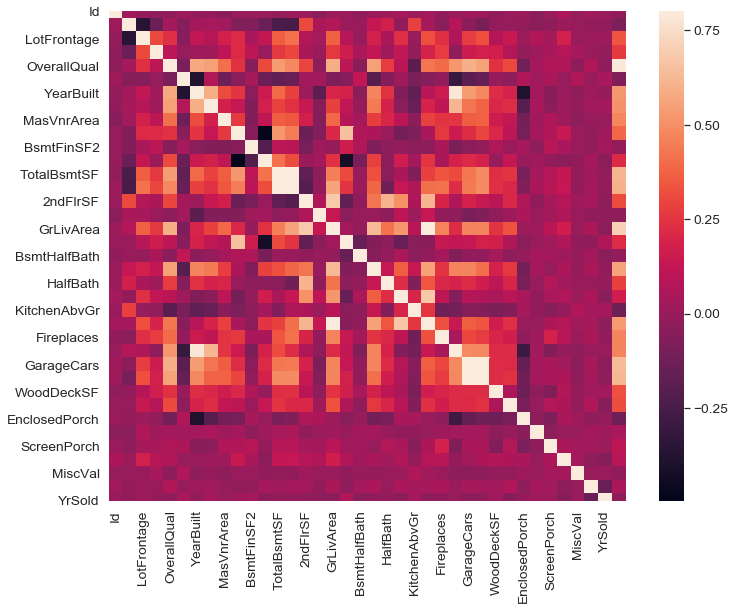

In [31]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [39]:
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451